In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Install Jcompl
!pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 4.3 MB/s 
     |████████████████████████████████| 1.6 MB 24.6 MB/s 
  Created wheel for jcopml: filename=jcopml-1.2.0-py2.py3-none-any.whl size=32032 sha256=2f9277fc17a220837b613ec90655f4f8c09460bf470a1b2b968a555d2fa84a26
  Stored in directory: /root/.cache/pip/wheels/da/9c/84/0670d7771fe7a5383c1ee4506df03e664d1f9abeb54db10e1d
Successfully built jcopml


In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tqdm.auto import tqdm

from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
sw_indo = stopwords.words("indonesian")
punct = list(punctuation)


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score, precision_score
%matplotlib inline

In [ ]:
# Import dataset yang digunakan, location of dataset in your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Source code for 
df = pd.read_csv('/content/drive/MyDrive/Client/knn/endemi.csv')
df

,username,tweetcreatedts,text
0,IDCorner,2022-04-14 23:47:26,Kabar Gembira! Indonesia Masuk Endemi Tahun De...
1,21BeritaTerkini,2022-04-14 23:47:09,Video: Kabar Gembira! Indonesia Masuk Endemi T...
2,cnbcindonesia,2022-04-14 23:36:05,Video: Kabar Gembira! Indonesia Masuk Endemi T...
3,Hadimakpul,2022-04-14 19:03:15,Menteri Keuangan Sri Mulyani yang menyampaikan...
4,nmuharikhaa,2022-04-14 16:41:17,@dhikaka Ga sesimple itu ya buat nenangin kead...
...,...,...,...
995,Andriyan_syahh,2022-04-10 03:07:18,"@ProfesorZubairi Kalau endemi, bukannya kasus ..."
996,dinny_huki,2022-04-10 03:06:51,Ramadhan Stop Provokasi\nMasyarakat harus siap...
997,LordIwan3,2022-04-10 03:03:37,Menuju Endemi COVID 19\nRamadhan Stop Provokas...
998,LordIwan3,2022-04-10 03:03:18,Upaya Transisi Dari Pandemi Ke Endemi\nRamadha...


In [ ]:
from jcopml.plot import plot_missing_value

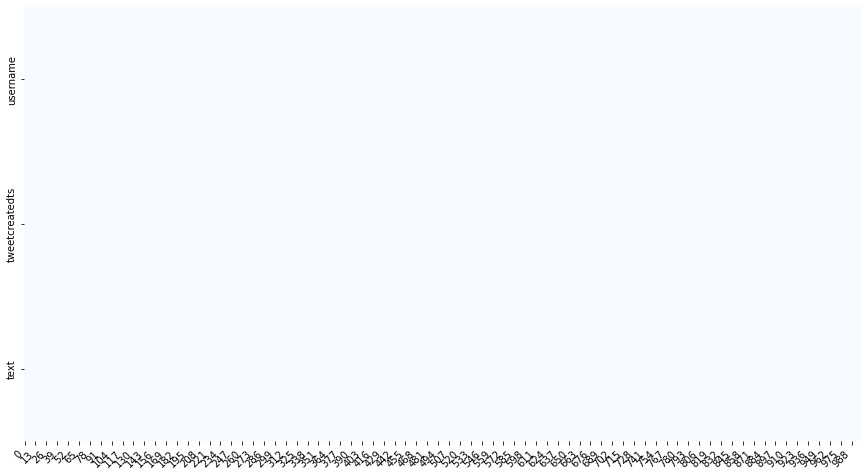

In [ ]:
plot_missing_value(df)

In [ ]:
df.duplicated().sum()

0

In [ ]:
import re

In [ ]:
def emoji(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' positiveemoji ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', tweet)
    return tweet

In [ ]:
def cleaning_tweet(tweet):
    tweet = re.sub('@[^\s]+', '', tweet)                              # Removes usernames
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)   # Remove URLs
    tweet = re.sub(r"\d+", " ", str(tweet))                           # Removes all digits
    tweet = re.sub('&quot;'," ", tweet)                               # Remove (&quot;) 
    tweet = emoji(tweet)                                              # Replaces Emojis
    tweet = re.sub(r"\s+", " ", str(tweet))                           # Replaces double spaces with single space  
    return tweet
  
df['text'] = df['text'].apply(cleaning_tweet)

In [ ]:
def preprocessing(Tweet):
    #Tweet = re.sub(r'(.)\1+',r'\1', Tweet)
    Tweet = Tweet.lower()
    #Tweet = Tweet.translate(str.maketrans("","",string.punctuation))
    return Tweet
    
df['text'] = df['text'].apply(preprocessing)

In [ ]:
df.head()

,username,tweetcreatedts,text
0,IDCorner,2022-04-14 23:47:26,kabar gembira! indonesia masuk endemi tahun de...
1,21BeritaTerkini,2022-04-14 23:47:09,video: kabar gembira! indonesia masuk endemi t...
2,cnbcindonesia,2022-04-14 23:36:05,video: kabar gembira! indonesia masuk endemi t...
3,Hadimakpul,2022-04-14 19:03:15,menteri keuangan sri mulyani yang menyampaikan...
4,nmuharikhaa,2022-04-14 16:41:17,ga sesimple itu ya buat nenangin keadaan pada...


In [ ]:
df = df.drop(['username', 'tweetcreatedts'], axis=1)
df.head()

,text
0,kabar gembira! indonesia masuk endemi tahun de...
1,video: kabar gembira! indonesia masuk endemi t...
2,video: kabar gembira! indonesia masuk endemi t...
3,menteri keuangan sri mulyani yang menyampaikan...
4,ga sesimple itu ya buat nenangin keadaan pada...


In [ ]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.3 MB/s 
     |████████████████████████████████| 1.4 MB 10.3 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 65 kB 3.4 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=c3ba2bf4fb0b6371114d4cca3276884c322d8e56e8245a002669e4f11558888c
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
from googletrans import Translator

In [ ]:
translator = Translator()
translations = {}
for column in df.columns:
    unique_elements =df[column].unique()
    for element in unique_elements:
        translations[element]=translator.translate(element).text
translations

{'kabar gembira! indonesia masuk endemi tahun depan - #idcorner': 'good news! Indonesia will be endemic next year - #idcorner',
 'video: kabar gembira! indonesia masuk endemi tahun depan ': 'video: good news! Indonesia will be endemic next year',
 'menteri keuangan sri mulyani yang menyampaikan keterangan selepas rapat mengatakan bahwa pada tahun diharapkan pandemi covid- mulai menurun dan indonesia masuk pada periode endemi sehingga akan mengurangi tekanan terhadap masyarakat dan perekonomian. ': 'Minister of Finance Sri Mulyani, who delivered a statement after the meeting, said that in 2020 it is hoped that the COVID-19 pandemic will begin to decline and Indonesia will enter an endemic period so that it will reduce pressure on society and the economy.',
 ' ga sesimple itu ya buat nenangin keadaan padahal sudah ditetapkan jadi endemi jg, dikantor gue gmnya yang parno karena doi kan udh lansia-_- tp sih asal masker sama kudu sehat aja. semoga sehat dah ya kita semua, biar cepet kembali

In [ ]:
df.replace(translations,inplace=True)
df.head()

,text
0,good news! Indonesia will be endemic next year...
1,video: good news! Indonesia will be endemic ne...
2,video: good news! Indonesia will be endemic ne...
3,"Minister of Finance Sri Mulyani, who delivered..."
4,It's not as simple as that to calm the situati...


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.1 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyser = SentimentIntensityAnalyzer()

In [ ]:
scores = [analyser.polarity_scores(x) for x in df['text']]
print(scores)
df['Compound_Score'] = [x['compound'] for x in scores]

[{'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'compound': 0.4926}, {'neg': 0.0, 'neu': 0.715, 'pos': 0.285, 'compound': 0.4926}, {'neg': 0.0, 'neu': 0.715, 'pos': 0.285, 'compound': 0.4926}, {'neg': 0.046, 'neu': 0.9, 'pos': 0.054, 'compound': 0.1027}, {'neg': 0.026, 'neu': 0.764, 'pos': 0.21, 'compound': 0.9371}, {'neg': 0.247, 'neu': 0.642, 'pos': 0.111, 'compound': -0.6808}, {'neg': 0.247, 'neu': 0.642, 'pos': 0.111, 'compound': -0.6808}, {'neg': 0.045, 'neu': 0.902, 'pos': 0.053, 'compound': 0.1027}, {'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'compound': 0.4404}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.093, 'neu': 0.802, 'pos': 0.105, 'compound': 0.0772}, {'neg': 0.174, 'neu': 0.826, 'pos': 0.0, 'compound': -0.7269}, {'neg': 0.174, 'neu': 0.826, 'pos': 0.0, 'compound': -0.7269}, {'neg': 0.031, 'neu': 0.757, 'pos': 0.212, 'compound': 0.8739}, {'neg': 0.0, 'neu': 0.612, 'pos': 0.388, 'compound': 0.9499}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg'

In [ ]:
df.head()

,text,Compound_Score
0,good news! Indonesia will be endemic next year...,0.4926
1,video: good news! Indonesia will be endemic ne...,0.4926
2,video: good news! Indonesia will be endemic ne...,0.4926
3,"Minister of Finance Sri Mulyani, who delivered...",0.1027
4,It's not as simple as that to calm the situati...,0.9371


In [ ]:
df.Compound_Score.value_counts()

 0.0000    442
-0.1280     63
 0.0772     49
 0.7096     43
 0.5106     32
          ... 
 0.2755      1
 0.8100      1
-0.2247      1
 0.5413      1
-0.5043      1
Name: Compound_Score, Length: 138, dtype: int64

In [ ]:
df.loc[df['Compound_Score'] <0.0, 'Sentiments'] = 'Negatif'

In [ ]:
df.loc[df['Compound_Score'] >= 0.0, 'Sentiments'] = 'Positif'

In [ ]:
df.head()

,text,Compound_Score,Sentiments
0,good news! Indonesia will be endemic next year...,0.4926,Positif
1,video: good news! Indonesia will be endemic ne...,0.4926,Positif
2,video: good news! Indonesia will be endemic ne...,0.4926,Positif
3,"Minister of Finance Sri Mulyani, who delivered...",0.1027,Positif
4,It's not as simple as that to calm the situati...,0.9371,Positif
